In [1]:
# To call functions outside of this folder
import sys  
sys.path.insert(0, '..')

# Load libraries 
import pandas as pd
import json
import matplotlib.pyplot as plt

# Load main demand forecasting class
from src.main import DemandForecasting

df = DemandForecasting()

/Users/qiaozhang/miniconda3/envs/demand-forecasting/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


apikey still available, logged in


In [74]:
ts = pd.read_csv('../data/raw/energy_consmption/AEP_hourly.csv')

In [107]:
ts.to_csv('../data/energy_consumption.csv', index=False)

In [111]:
ts[ts.y > 3.2e+06]

datetime          y       sku
2019-01-20 2019-01-20  3302854.0  engy_use
2020-01-05 2020-01-05  3235220.0  engy_use
2020-02-16 2020-02-16  3382229.0  engy_use
2023-01-01 2023-01-01  3442532.0  engy_use

In [114]:
ts.loc[pd.to_datetime('2023-01-01'), 'y'] = 2842532.0

<Axes: >

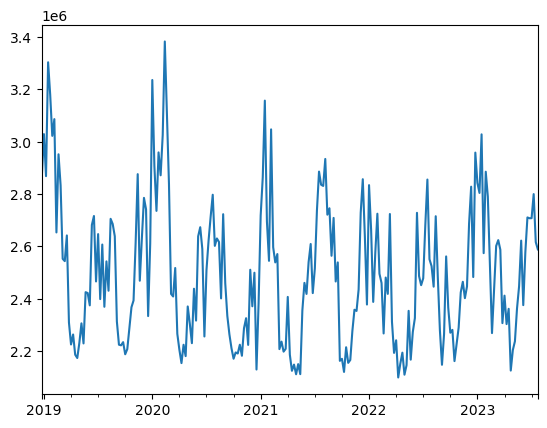

In [115]:
ts['y'].plot()

In [76]:
ts.index = ts['Datetime']

In [77]:
ts.index = pd.to_datetime(ts.index)

In [79]:
ts = ts.resample('W').sum()

In [84]:
ts.index = ts.index + pd.DateOffset(years=5)

In [86]:
ts

AEP_MW
Datetime             
2009-10-03   933991.0
2009-10-10  2332037.0
2009-10-17  2378184.0
2009-10-24  2379237.0
2009-10-31  2325624.0
...               ...
2023-07-08  2707980.0
2023-07-15  2799780.0
2023-07-22  2616533.0
2023-07-29  2588782.0
2023-08-05  1488102.0

[723 rows x 1 columns]

In [85]:
ts = ts[ts.index <= pd.to_datetime('2023-10-01')]

In [87]:
ts = ts.reset_index()

In [88]:
ts = ts.rename(columns={'Datetime':'datetime', 'AEP_MW':'y'})

In [89]:
ts['sku'] = 'engy_use'

In [90]:
ts.index = pd.to_datetime(ts['datetime'])

In [65]:
ts = ts.resample('M').sum()

In [100]:
ts.index[0]

Timestamp('2019-01-05 00:00:00')

In [93]:
ts = ts[ts.index >= pd.to_datetime('2019')]

In [94]:
ts.index[-1]

Timestamp('2023-08-05 00:00:00')

In [98]:
ts.shape

(240, 3)

In [103]:
ts.index = pd.date_range(start='2018-12-25', end='2023-08-05', freq='W')

In [104]:
ts['datetime'] = ts.index

In [106]:
ts = ts[:-1]

In [40]:
pd.infer_freq(ts['datetime'])

In [36]:
ts.columns

Index(['datetime', 'y', 'sku'], dtype='object')

In [82]:
ts.to_csv('../data/demand_forecasting_demo_data.csv', index=False)

In [69]:
c

datetime     sku    y
2   2018-01-01  Item_C  264
5   2018-02-01  Item_C  164
8   2018-03-01  Item_C  217
11  2018-04-01  Item_C  195
14  2018-05-01  Item_C  229
17  2018-06-01  Item_C  203
20  2018-07-01  Item_C  272
24  2018-08-01  Item_C  311
28  2018-09-01  Item_C  363
33  2018-10-01  Item_C  228
38  2018-11-01  Item_C  232
43  2018-12-01  Item_C  171
48  2019-01-01  Item_C  247
53  2019-02-01  Item_C  195
58  2019-03-01  Item_C  234
63  2019-04-01  Item_C  221
68  2019-05-01  Item_C  272
73  2019-06-01  Item_C  256
78  2019-07-01  Item_C  227
83  2019-08-01  Item_C  151
88  2019-09-01  Item_C  151
93  2019-10-01  Item_C  204
98  2019-11-01  Item_C  187
103 2019-12-01  Item_C   90
108 2020-01-01  Item_C  170
113 2020-02-01  Item_C  169
118 2020-03-01  Item_C  208
123 2020-04-01  Item_C   87
128 2020-05-01  Item_C  126
133 2020-06-01  Item_C  137
138 2020-07-01  Item_C  164
143 2020-08-01  Item_C  170
148 2020-09-01  Item_C  192
153 2020-10-01  Item_C  184
158 2020-11-01  Item_C  199
163 2020-12-01  Item_C  107
168 2021-01-01  Item_C  254
173 2021-02-01  Item_C  170
178 2021-03-01  Item_C  215
183 2021-04-01  Item_C  143
188 2021-05-01  Item_C  213
193 2021-06-01  Item_C  243
198 2021-07-01  Item_C  199

In [50]:
ts.sku.unique()

array(['Item_A', 'Item_B', 'Item_C', 'Item_D', 'Item_E'], dtype=object)

In [48]:
Item_F

datetime     sku    y
377  2020-06-07  Item_F    0
378  2020-06-14  Item_F   20
379  2020-06-21  Item_F   25
380  2020-06-28  Item_F    0
381  2020-07-05  Item_F    0
..          ...     ...  ...
503  2022-11-06  Item_F   30
504  2022-11-13  Item_F    0
505  2022-11-20  Item_F   70
506  2022-11-27  Item_F  100
507  2022-12-04  Item_F   50

[131 rows x 3 columns]

In [29]:
item_f

datetime    y     sku
518  2018-05-06   11  Item_F
519  2018-05-13    6  Item_F
520  2018-05-20    4  Item_F
521  2018-05-27    8  Item_F
522  2018-06-03    1  Item_F
..          ...  ...     ...
753  2022-11-06   30  Item_F
754  2022-11-13    0  Item_F
755  2022-11-20   70  Item_F
756  2022-11-27  100  Item_F
757  2022-12-04   50  Item_F

[240 rows x 3 columns]

In [51]:
ts = pd.concat([ts, Item_F])

In [52]:
ts.to_csv('../data/demand_forecasting_demo_data_new.csv', index=False)

NameError: name 'itemf' is not defined

In [3]:
# Step 1 - evaluate RMSE
res = df.forecast(ts, 0, model='all', run_test=True)

# Step 2 - forecast
# res = df.forecast(ts, 26, model='prophet_plus', characteristic='fuzzy')

n_predict is 0, force run_test to be true
characteristic not provided, running profiling
apikey still available, logged in
Start profiling, note, predictability been disabled
Change point detection
predictability temporarily using order_quantity predictability
apikey still available, logged in
Start profiling, note, predictability been disabled
Change point detection
profiling completed, data characteristic is  fuzzy
callindg model: prophet_plus
has_idsc_model
apikey still available, logged in
callindg model: ceif_plus
has_idsc_model
IDSC ceif
apikey still available, logged in
IDSC ceif completed


In [18]:
res['forecast'][0]['test'].index

DatetimeIndex(['2022-05-01', '2022-05-08', '2022-05-15', '2022-05-22',
               '2022-05-29', '2022-06-05', '2022-06-12', '2022-06-19',
               '2022-06-26', '2022-07-03', '2022-07-10', '2022-07-17',
               '2022-07-24', '2022-07-31', '2022-08-07', '2022-08-14',
               '2022-08-21', '2022-08-28', '2022-09-04', '2022-09-11',
               '2022-09-18', '2022-09-25', '2022-10-02', '2022-10-09',
               '2022-10-16', '2022-10-23', '2022-10-30', '2022-11-06',
               '2022-11-13', '2022-11-20', '2022-11-27', '2022-12-04',
               '2022-12-11', '2022-12-18', '2022-12-25', '2023-01-01',
               '2023-01-08', '2023-01-15', '2023-01-22', '2023-01-29',
               '2023-02-05', '2023-02-12', '2023-02-19', '2023-02-26',
               '2023-03-05', '2023-03-12', '2023-03-19', '2023-03-26',
               '2023-04-02', '2023-04-09', '2023-04-16', '2023-04-23'],
              dtype='datetime64[ns]', freq=None)

In [32]:
ts[ts.index > pd.to_datetime('2018')].loc[res['forecast'][0]['test'].index]['y']

2022-05-01     0
2022-05-08     0
2022-05-15    10
2022-05-22     7
2022-05-29     9
2022-06-05     6
2022-06-12     5
2022-06-19    35
2022-06-26    20
2022-07-03     0
2022-07-10     5
2022-07-17     5
2022-07-24     9
2022-07-31    14
2022-08-07    20
2022-08-14    10
2022-08-21    10
2022-08-28     1
2022-09-04    15
2022-09-11    22
2022-09-18    10
2022-09-25    10
2022-10-02    20
2022-10-09     0
2022-10-16     0
2022-10-23     0
2022-10-30    15
2022-11-06    10
2022-11-13     0
2022-11-20    10
2022-11-27    10
2022-12-04     0
2022-12-11     0
2022-12-18     0
2022-12-25     7
2023-01-01    10
2023-01-08    10
2023-01-15     0
2023-01-22     5
2023-01-29     0
2023-02-05     7
2023-02-12     2
2023-02-19     0
2023-02-26    20
2023-03-05    13
2023-03-12    10
2023-03-19     0
2023-03-26     0
2023-04-02    10
2023-04-09     8
2023-04-16    10
2023-04-23     5
Name: y, dtype: int64

In [7]:
pd.DataFrame(res['forecast'][0]['forecast'], columns=['datetime', 'y'])

datetime   y
0  2023-04-23   0
1  2023-04-30  18
2  2023-05-07  12
3  2023-05-14  10
4  2023-05-21  12
5  2023-05-28   0
6  2023-06-04  11
7  2023-06-11   0
8  2023-06-18  11
9  2023-06-25  13
10 2023-07-02   0
11 2023-07-09  18
12 2023-07-16  12
13 2023-07-23  10
14 2023-07-30  12
15 2023-08-06   0
16 2023-08-13  11
17 2023-08-20   0
18 2023-08-27  11
19 2023-09-03  13
20 2023-09-10   0
21 2023-09-17  18
22 2023-09-24  12
23 2023-10-01  10
24 2023-10-08  12
25 2023-10-15   0

In [7]:
for r in res['forecast']:
    print(r['model'])
    # print(r['RMSE'])
    # print(r['order_quantity_RMSE'])
    print(r['interm_scores'])
    print('________')
    r['test'].plot(title=r['model'] + '-test')

prophet_plus


KeyError: 'interm_scores'

In [10]:
res[4]['test_raw']

IndexError: list index out of range

In [ ]:
# Step 2 - forecast
res = df.forecast(ts, 30, model='prophet')

11:17:02 - cmdstanpy - INFO - Chain [1] start processing
11:17:02 - cmdstanpy - INFO - Chain [1] done processing


callindg model: prophet
            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
260 2023-04-30  8.921487   -7.908574   21.012119     8.921487     8.921487   
261 2023-05-07  8.931226   -6.567967   22.604438     8.931226     8.931226   
262 2023-05-14  8.940965   -8.081720   21.526347     8.940905     8.941007   
263 2023-05-21  8.950703   -9.985601   19.493650     8.950543     8.950831   
264 2023-05-28  8.960442   -8.813073   20.526393     8.960129     8.960702   
265 2023-06-04  8.970180   -6.966844   23.563550     8.969667     8.970604   
266 2023-06-11  8.979919   -4.608789   25.118377     8.979231     8.980524   
267 2023-06-18  8.989657   -4.180691   25.485273     8.988761     8.990488   
268 2023-06-25  8.999396   -4.686704   24.961761     8.998250     9.000445   
269 2023-07-02  9.009134   -5.880469   23.125865     9.007781     9.010505   
270 2023-07-09  9.018873   -5.090580   23.769587     9.017264     9.020526   
271 2023-07-16  9.028611   -4.761036   2

In [ ]:
res[0]['forecast']

y
2023-04-23   6.399845
2023-04-30   7.302793
2023-05-07   6.396294
2023-05-14   4.970687
2023-05-21   5.305157
2023-05-28   7.784164
2023-06-04  10.317059
2023-06-11  10.779112
2023-06-18   9.450969
2023-06-25   8.477737
2023-07-02   9.113033
2023-07-09  10.255423
2023-07-16  10.103181
2023-07-23   8.778221
2023-07-30   8.498648
2023-08-06  10.921038
2023-08-13  14.851353
2023-08-20  17.189353
2023-08-27  16.119128
2023-09-03  12.892211
2023-09-10  10.261806
2023-09-17   9.549662
2023-09-24   9.726234
2023-10-01   9.262091
2023-10-08   8.233260
2023-10-15   8.141886
2023-10-22   9.880192
2023-10-29  12.428733
2023-11-05  13.770027
2023-11-12  12.799587

<Axes: title={'center': 'forecasted'}>

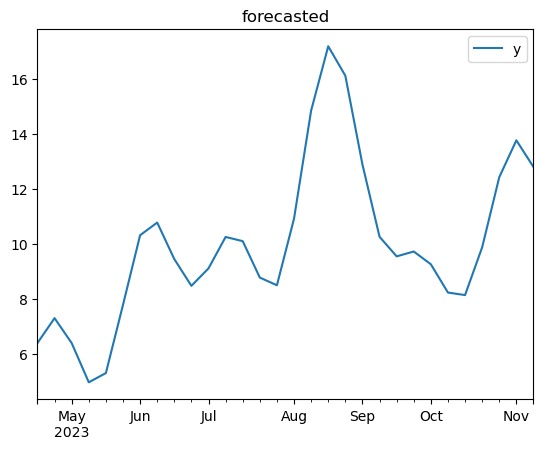

In [ ]:
res[0]['forecast'].plot(title='forecasted')